In [1]:
import preprocessor, league_table, soccer_model, data_prep

In [2]:
import math
import numpy as np
import pandas as pd
from itertools import cycle
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from scipy import interp
import scipy.stats as scs
import statsmodels.api as sm
from scipy.spatial.distance import cdist

from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format='retina'

Enter path to file that you wish to preprocess and plot: (should be a .csv file) ../data/FootballEurope/FootballEurope.csv


/Users/CEO/DSI/dsi-CapstoneProj/src/league_table.py:67: DtypeWarning: Columns (39,61) have mixed types. Specify dtype option on import or set low_memory=False.
  plot_table = plot_league_table(csv_file)


                EPLresultH  EPLresultA  EPLresult
Man City               220         167        387
Chelsea                213         172        385
Arsenal                208         165        373
Tottenham              197         165        362
Man Utd                197         161        358
Liverpool              190         153        343
Everton                178         112        290
Southampton            152         114        266
Stoke                  152          89        241
West Ham               147          93        240
Swansea                138          94        232
West Brom              129          88        217
Sunderland              99          79        178
Crystal Palace          89          87        176
Leicester              102          64        166
Newcastle              109          57        166
Aston Villa             73          61        134
Norwich                 78          33        111
Hull                    73          33        106


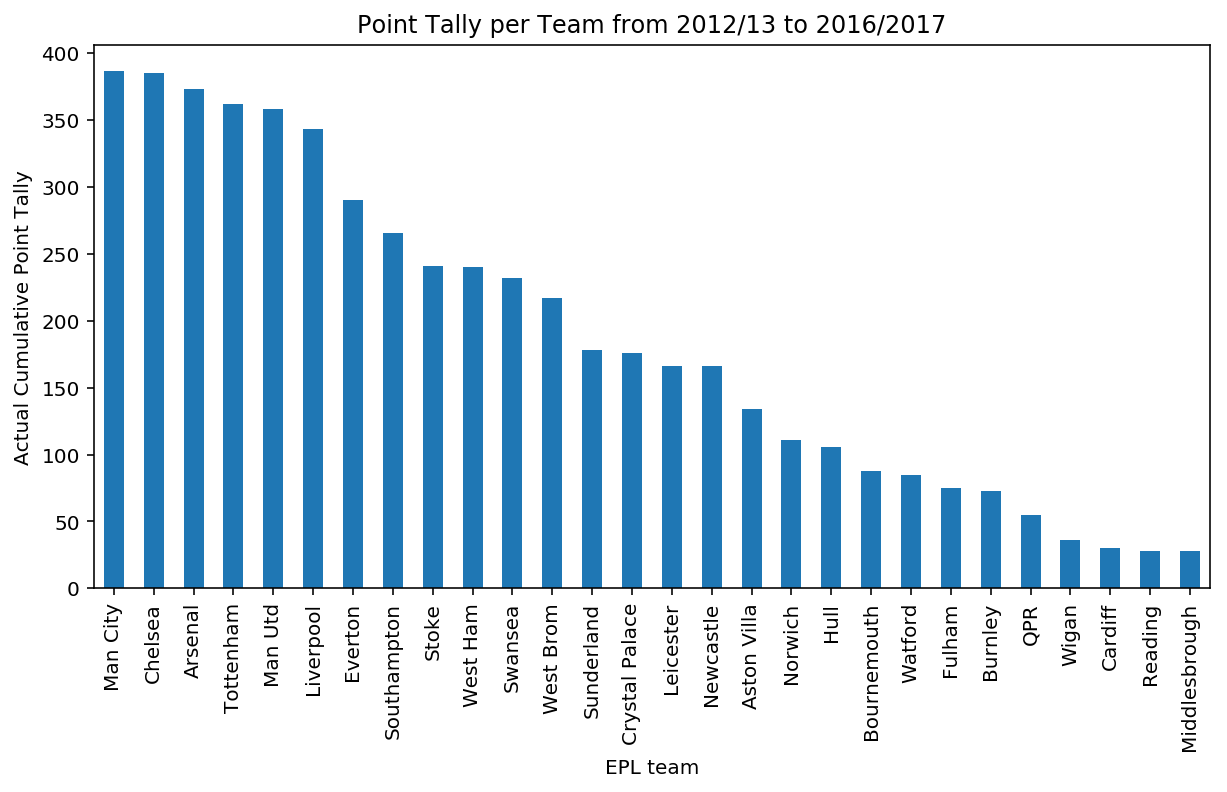

<Figure size 432x288 with 0 Axes>

In [3]:
%run league_table.py #../data/FootballEurope/FootballEurope.csv

In [4]:
raw_df = pd.read_csv('../data/FootballEurope/FootballEurope.csv')

/Users/CEO/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (39,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
raw_df.head()

,Unnamed: 0,id,homeTacklesTotalHT,homeShotsTotalHT,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,awayDribblesAttemptedHT,awayTeamLineUp,awayShotsBlockedHT,awayShotsTotalHT,homeDribbleSuccessHT,homeFoulsCommitedFT,homeAerialsTotalFT,homeRatingsHT,awayShotsOnTargetFT,awayShotsBlockedFT,homeInterceptionsHT,awayPossessionHT,homePassesKeyFT,awayShotsOnTargetHT,awayDribblesWonFT,awayTackleSuccessHT,homeCornersTotalFT,homeAerialsTotalHT,homeShotsBlockedFT,awayCornersTotalHT,homeCornersTotalHT,homeDribbleSuccessFT,homeTeamLineUp,awayPassSuccessHT,awayDribblesWonHT,homeDispossessedHT,awayAerialsTotalFT,homeShotsBlockedHT,awayPassesKeyFT,homeTackleSuccessHT,awayPassesKeyHT,homeFormation,awayInterceptionsHT,awayDispossessedHT,refereeName,homeDribblesWonHT,homePossessionFT,awayAerialsTotalHT,awayGoalHT,awayManagerName,awayInterceptionsFT,homeDribbledPastFT,homeGoalHT,awayDribbleSuccessHT,homeGoalFT,awayTacklesTotalHT,homeDribblesWonFT,awayTackleSuccessFT,awayTeam,homeDispossessedFT,awayOffsidesCaughtFT,awayDribbledPastFT,homeShotsOnTargetHT,awayFormation,awayOffsidesCaughtHT,homeDribbledPastHT,awayFoulsCommitedHT,homeShotsTotalFT,homePassSuccessFT,homeFoulsCommitedHT,awayCornersTotalFT,homeTeam,homeManagerName,awayFoulsCommitedFT,homeShotsOnTargetFT,homeDribblesAttemptedHT,awayRatingsHT,homeOffsidesCaughtHT,homeTacklesTotalFT,awayDribbledPastHT,awayGoalFT,homePassesKeyHT,homeOffsidesCaughtFT,homePossessionHT,venueName,awayDribblesAttemptedFT,homeInterceptionsFT,homePassSuccessHT,date,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,division
0,1,1,18,10,14.0,73.69,6.38,47.22,12,"Joel Robles,Paul Scharner,Antolin Alcaraz,Emme...",3.0,5.0,25.00,12,22,6.39,2.0,4.0,12,51.26,14,1.0,10.0,87.50,7.0,16,4.0,0.0,4.0,38.89,"Wojciech Szczesny,Bacary Sagna,Laurent Kosciel...",72.18,7.0,5,22,4.0,9.0,60.71,3.0,4231,20,6.0,Mike Dean,1.0,47.65,16,1,Roberto Martinez,34,10.0,1,59.09,4,10,5.0,75.00,Wigan,6,5.0,5.0,1.0,343,1.0,7.0,7,21,66.73,5,4.0,Arsenal,Arsène Wenger,11,10.0,5.0,6.21,1.0,34,1.0,1,7,2.0,48.74,Emirates Stadium,20,21,69.45,2013-05-14,18,6.73,12.0,75.00,52.35,11.0,EPL
1,2,2,13,3,11.0,75.78,6.39,27.27,5,"Petr Cech,César Azpilicueta,Branislav Ivanovic...",1.0,4.0,50.00,12,15,6.24,5.0,4.0,9,51.19,7,2.0,3.0,75.00,8.0,9,4.0,3.0,4.0,31.82,"Gerhard Tremmel,Angel Rangel,Garry Monk,Ashley...",83.18,2.0,4,15,1.0,6.0,86.36,1.0,4231,5,8.0,Kevin Friend,2.0,53.71,9,0,Roberto Di Matteo,11,3.0,0,40.00,1,9,4.0,86.96,Chelsea,13,2.0,4.0,0.0,4231,0.0,2.0,4,10,80.95,7,6.0,Swansea,Michael Laudrup,10,2.0,5.0,6.18,1.0,22,2.0,1,3,3.0,48.81,Liberty Stadium,11,14,78.64,2012-11-03,26,6.37,13.0,88.89,46.29,11.0,EPL
2,3,3,10,5,16.0,74.86,6.73,66.67,4,"Anders Lindegaard,Antonio Valencia,Phil Jones,...",3.0,8.0,50.00,12,19,5.80,6.0,5.0,3,65.24,16,3.0,6.0,77.78,3.0,9,6.0,2.0,0.0,45.00,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",84.24,3.0,5,19,2.0,11.0,68.75,6.0,4231,5,6.0,Michael Oliver,2.0,39.82,9,3,Alex Ferguson,15,6.0,1,75.00,5,9,5.0,73.53,Man Utd,9,2.0,5.0,1.0,4231,2.0,3.0,3,19,69.70,5,5.0,West Brom,Steve Clarke,8,6.0,4.0,6.53,2.0,25,2.0,5,5,4.0,34.76,The Hawthorns,9,5,75.31,2013-05-19,20,6.04,11.0,75.00,60.18,15.0,EPL
3,4,4,8,5,6.0,78.43,6.41,27.78,4,"Michel Vorm,Angel Rangel,Garry Monk,Ashley Wil...",2.0,7.0,58.33,11,36,6.15,2.0,3.0,10,52.49,10,1.0,5.0,61.11,3.0,17,3.0,1.0,1.0,63.33,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",79.78,0.0,3,36,1.0,8.0,100.00,4.0,4231,12,4.0,Lee Mason,3.0,45.98,17,1,Michael Laudrup,24,5.0,1,0.00,2,9,8.0,63.54,Swansea,9,4.0,8.0,2.0,4231,1.0,0.0,4,14,64.96,5,3.0,West Brom,Steve Clarke,10,5.0,6.0,6.26,1.0,24,3.0,1,5,1.0,47.51,The Hawthorns,18,23,67.21,2013-03-09,23,6.43,14.0,79.55,54.02,11.0,EPL
4,5,5,13,6,9.0,61.07,6.51,40.00,9,"Asmir Begovic,Geoff Cameron,Marc Wilson,Ryan S...",1.0,4.0,81.25,10,48,6.21,4.0,2.0,2,43.07,13,2.0,6.0,60.00,14.0,24,4.0,2.0,7.0,66.18,"Robert Elliot,Mathieu Debuchy,Mapou Yanga-Mbiw...",61.31,4.0,8,48,0.0,5.0,66.67,3

In [6]:
len(raw_df.columns)

94

In [7]:
df = data_prep.clean('../data/FootballEurope/FootballEurope.csv')

/Users/CEO/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (39,61) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [8]:
df[sorted(df.columns)].head()

,awayAerialsTotalFT,awayCornersTotalFT,awayDispossessedFT,awayDribbleSuccessFT,awayDribbledPastFT,awayDribblesAttemptedFT,awayDribblesWonFT,awayFormation,awayFormationCode,awayFoulsCommitedFT,awayGoalFT,awayInterceptionsFT,awayManagerName,awayOffsidesCaughtFT,awayPassSuccessFT,awayPassesKeyFT,awayPossessionFT,awayRatingsFT,awayShotsBlockedFT,awayShotsOnTargetFT,awayShotsTotalFT,awayTackleSuccessFT,awayTacklesTotalFT,awayTeam,awayTeamCode,awayTeamLineUp,awayXResults,awayXResultsLabel,awayXResultsWDL,date,division,homeAerialsTotalFT,homeCornersTotalFT,homeDispossessedFT,homeDribbleSuccessFT,homeDribbledPastFT,homeDribblesAttemptedFT,homeDribblesWonFT,homeFormation,homeFormationCode,homeFoulsCommitedFT,homeGoalFT,homeInterceptionsFT,homeManagerName,homeOffsidesCaughtFT,homePassSuccessFT,homePassesKeyFT,homePossessionFT,homeRatingsFT,homeShotsBlockedFT,homeShotsOnTargetFT,homeShotsTotalFT,homeTackleSuccessFT,homeTacklesTotalFT,homeTeam,homeTeamCode,homeTeamLineUp,homeXResults,homeXResultsLabel,homeXResultsWDL,refereeName,venueName
0,22,4.0,14.0,47.22,5.0,20,10.0,343,0,11,1,34,Roberto Martinez,5.0,73.69,9.0,52.35,6.38,4.0,2.0,11.0,75.00,18,Wigan,13,"Joel Robles,Paul Scharner,Antolin Alcaraz,Emme...",-3,-1.0,L,2013-05-14,EPL,22,7.0,6,38.89,10.0,12.0,5.0,4231,2,12,4,21,Arsène Wenger,2.0,66.73,14,47.65,6.73,4.0,10.0,21,75.00,34,Arsenal,1,"Wojciech Szczesny,Bacary Sagna,Laurent Kosciel...",3,1,W,Mike Dean,Emirates Stadium
1,15,6.0,11.0,27.27,4.0,11,3.0,4231,2,10,1,11,Roberto Di Matteo,2.0,75.78,6.0,46.29,6.39,4.0,5.0,11.0,86.96,26,Chelsea,7,"Petr Cech,César Azpilicueta,Branislav Ivanovic...",0,0.0,D,2012-11-03,EPL,15,8.0,13,31.82,3.0,13.0,4.0,4231,2,12,1,14,Michael Laudrup,3.0,80.95,7,53.71,6.37,4.0,2.0,10,88.89,22,Swansea,2,"Gerhard Tremmel,Angel Rangel,Garry Monk,Ashley...",0,0,D,Kevin Friend,Liberty Stadium
2,19,5.0,16.0,66.67,5.0,9,6.0,4231,2,8,5,15,Alex Ferguson,2.0,74.86,11.0,60.18,6.73,5.0,6.0,15.0,73.53,20,Man Utd,9,"Anders Lindegaard,Antonio Valencia,Phil Jones,...",0,0.0,D,2013-05-19,EPL,19,3.0,9,45.00,6.0,11.0,5.0,4231,2,12,5,5,Steve Clarke,4.0,69.70,16,39.82,6.04,6.0,6.0,19,75.00,25,West Brom,3,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",0,0,D,Michael Oliver,The Hawthorns
3,36,3.0,6.0,27.78,8.0,18,5.0,4231,2,10,1,24,Michael Laudrup,4.0,78.43,8.0,54.02,6.41,3.0,2.0,11.0,63.54,23,Swansea,2,"Michel Vorm,Angel Rangel,Garry Monk,Ashley Wil...",-1,-1.0,L,2013-03-09,EPL,36,3.0,9,63.33,5.0,14.0,8.0,4231,2,11,2,23,Steve Clarke,1.0,64.96,10,45.98,6.43,3.0,5.0,14,79.55,24,West Brom,3,"Ben Foster,Billy Jones,Jonas Olsson,Gareth McA...",1,1,W,Lee Mason,The Hawthorns
4,48,4.0,9.0,40.00,16.0,16,6.0,451,3,14,1,19,Tony Pulis,3.0,61.07,5.0,46.80,6.51,2.0,4.0,8.0,61.61,37,Stoke,11,"Asmir Begovic,Geoff Cameron,Marc Wilson,Ryan S...",-1,-1.0,L,2013-03-10,EPL,48,14.0,13,66.18,6.0,24.0,16.0,4231,2,10,2,7,Alan Pardew,1.0,77.44,13,53.20,6.45,4.0,4.0,16,71.93,25,Newcastle,4,"Robert Elliot,Mathieu Debuchy,Mapou Yanga-Mbiw...",1,1,W,Andre Marriner,St James' Park


In [9]:
df2 = data_prep.only_numerics_df('../data/FootballEurope/FootballEurope.csv')

/Users/CEO/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (39,61) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df2.head()

,awayAerialsTotalFT,awayCornersTotalFT,awayDispossessedFT,awayDribbleSuccessFT,awayDribbledPastFT,awayDribblesAttemptedFT,awayDribblesWonFT,awayFormation,awayFormationCode,awayFoulsCommitedFT,awayGoalFT,awayInterceptionsFT,awayOffsidesCaughtFT,awayPassSuccessFT,awayPassesKeyFT,awayPossessionFT,awayRatingsFT,awayShotsBlockedFT,awayShotsOnTargetFT,awayShotsTotalFT,awayTackleSuccessFT,awayTacklesTotalFT,awayTeam,awayTeamCode,awayXResults,awayXResultsLabel,awayXResultsWDL,homeAerialsTotalFT,homeCornersTotalFT,homeDispossessedFT,homeDribbleSuccessFT,homeDribbledPastFT,homeDribblesAttemptedFT,homeDribblesWonFT,homeFormation,homeFormationCode,homeFoulsCommitedFT,homeGoalFT,homeInterceptionsFT,homeOffsidesCaughtFT,homePassSuccessFT,homePassesKeyFT,homePossessionFT,homeRatingsFT,homeShotsBlockedFT,homeShotsOnTargetFT,homeShotsTotalFT,homeTackleSuccessFT,homeTacklesTotalFT,homeTeam,homeTeamCode,homeXResults,homeXResultsLabel,homeXResultsWDL,refereeName,venueName
0,22,4.0,14.0,47.22,5.0,20,10.0,343,0,11,1,34,5.0,73.69,9.0,52.35,6.38,4.0,2.0,11.0,75.00,18,Wigan,13,-3,-1.0,L,22,7.0,6,38.89,10.0,12.0,5.0,4231,2,12,4,21,2.0,66.73,14,47.65,6.73,4.0,10.0,21,75.00,34,Arsenal,1,3,1,W,17,7
1,15,6.0,11.0,27.27,4.0,11,3.0,4231,2,10,1,11,2.0,75.78,6.0,46.29,6.39,4.0,5.0,11.0,86.96,26,Chelsea,7,0,0.0,D,15,8.0,13,31.82,3.0,13.0,4.0,4231,2,12,1,14,3.0,80.95,7,53.71,6.37,4.0,2.0,10,88.89,22,Swansea,2,0,0,D,9,12
2,19,5.0,16.0,66.67,5.0,9,6.0,4231,2,8,5,15,2.0,74.86,11.0,60.18,6.73,5.0,6.0,15.0,73.53,20,Man Utd,9,0,0.0,D,19,3.0,9,45.00,6.0,11.0,5.0,4231,2,12,5,5,4.0,69.70,16,39.82,6.04,6.0,6.0,19,75.00,25,West Brom,3,0,0,D,16,26
3,36,3.0,6.0,27.78,8.0,18,5.0,4231,2,10,1,24,4.0,78.43,8.0,54.02,6.41,3.0,2.0,11.0,63.54,23,Swansea,2,-1,-1.0,L,36,3.0,9,63.33,5.0,14.0,8.0,4231,2,11,2,23,1.0,64.96,10,45.98,6.43,3.0,5.0,14,79.55,24,West Brom,3,1,1,W,10,26
4,48,4.0,9.0,40.00,16.0,16,6.0,451,3,14,1,19,3.0,61.07,5.0,46.80,6.51,2.0,4.0,8.0,61.61,37,Stoke,11,-1,-1.0,L,48,14.0,13,66.18,6.0,24.0,16.0,4231,2,10,2,7,1.0,77.44,13,53.20,6.45,4.0,4.0,16,71.93,25,Newcastle,4,1,1,W,0,20


In [11]:
df2.describe()

,awayAerialsTotalFT,awayCornersTotalFT,awayDispossessedFT,awayDribbleSuccessFT,awayDribbledPastFT,awayDribblesAttemptedFT,awayDribblesWonFT,awayFormationCode,awayFoulsCommitedFT,awayGoalFT,awayInterceptionsFT,awayOffsidesCaughtFT,awayPassSuccessFT,awayPassesKeyFT,awayPossessionFT,awayRatingsFT,awayShotsBlockedFT,awayShotsOnTargetFT,awayShotsTotalFT,awayTackleSuccessFT,awayTacklesTotalFT,awayTeamCode,awayXResults,awayXResultsLabel,homeAerialsTotalFT,homeCornersTotalFT,homeDispossessedFT,homeDribbleSuccessFT,homeDribbledPastFT,homeDribblesAttemptedFT,homeDribblesWonFT,homeFormationCode,homeFoulsCommitedFT,homeGoalFT,homeInterceptionsFT,homeOffsidesCaughtFT,homePassSuccessFT,homePassesKeyFT,homePossessionFT,homeRatingsFT,homeShotsBlockedFT,homeShotsOnTargetFT,homeShotsTotalFT,homeTackleSuccessFT,homeTacklesTotalFT,homeTeamCode,homeXResults,homeXResultsLabel,refereeName,venueName
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1897.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,35.019474,4.768947,11.652632,54.045126,9.296316,15.564737,8.604737,1.734737,11.442632,1.185789,15.014737,2.033158,66.202174,8.766316,38.828721,6.422389,3.174737,3.918421,11.690000,69.426326,28.421579,12.090000,-0.352632,-0.152873,35.014737,6.025789,11.525263,54.122232,8.605263,16.913684,9.296842,1.718947,10.816842,1.538421,14.979474,2.197895,68.811384,11.051053,41.371274,6.489500,3.953684,4.865789,14.722105,70.695500,27.199474,12.090000,0.352632,0.154211,11.621053,16.442105
std,12.297272,2.639032,4.430538,16.704883,4.325012,6.489390,4.356189,0.969875,3.518457,1.159119,5.734956,1.595958,8.267677,3.999884,20.538569,0.204565,2.159026,2.195351,4.810709,10.716720,7.998332,7.649359,1.789875,0.853655,12.297985,3.120009,4.344183,16.119153,4.356056,6.559721,4.323819,0.923600,3.371368,1.303819,5.905710,1.605282,8.534909,4.744113,21.722795,0.203004,2.519845,2.621535,5.705576,11.362333,7.981396,7.649359,1.789875,0.853644,6.930147,10.269220
min,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,40.610000,0.000000,0.230000,5.670000,0.000000,0.000000,1.000000,31.410000,7.000000,1.000000,-8.000000,-1.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,42.400000,1.000000,0.200000,5.830000,0.000000,0.000000,1.000000,27.780000,7.000000,1.000000,-6.000000,-1.000000,0.000000,0.000000
25%,26.000000,3.000000,9.000000,43.330000,6.000000,11.000000,6.000000,1.000000,9.000000,0.000000,11.000000,1.000000,60.435000,6.000000,35.602500,6.290000,2.000000,2.000000,8.000000,62.500000,23.000000,6.000000,-1.000000,-1.000000,26.000000,4.000000,8.000000,43.750000,6.000000,12.000000,6.000000,1.000000,8.000000,1.000000,11.000000,1.000000,62.705000,8.000000,38.937500,6.360000,2.000000,3.000000,11.000000,63.160000,22.000000,6.000000,-1.000000,-1.000000,7.000000,8.000000
50%,34.000000,4.000000,11.000000,53.850000,9.000000,15.000000,8.000000,2.000000,11.000000,1.000000,14.000000,2.000000,66.410000,8.000000,45.975000,6.410000,3.000000,4.000000,11.000000,69.230000,28.000000,11.000000,0.000000,0.000000,34.000000,6.000000,11.000000,54.550000,8.000000,16.000000,9.000000,2.000000,11.000000,1.000000,14.000000,2.000000,69.010000,10.000000,48.600000,6.480000,4.000000,5.000000,14.000000,71.430000,27.000000,11.000000,0.000000,0.000000,12.000000,17.000000
75%,42.000000,6.000000,14.000000,64.710000,12.000000,19.000000,11.000000,2.000000,14.000000,2.000000,18.000000,3.000000,72.052500,11.000000,

In [12]:
df2.groupby('homeXResults')['homeGoalFT','awayGoalFT'].mean()

,homeGoalFT,awayGoalFT
homeXResults,,
-6,0.333333,6.333333
-5,0.200000,5.200000
-4,0.142857,4.142857
-3,0.392405,3.392405
-2,0.577465,2.577465
-1,0.726415,1.726415
0,1.008493,1.008493
1,1.652500,0.652500
2,2.503817,0.503817


In [13]:
df2.groupby('awayXResults')['homeGoalFT','awayGoalFT'].mean()

,homeGoalFT,awayGoalFT
awayXResults,,
-8,8.000000,0.000000
-7,7.000000,0.000000
-6,6.000000,0.000000
-5,5.411765,0.411765
-4,4.345455,0.345455
-3,3.366667,0.366667
-2,2.503817,0.503817
-1,1.652500,0.652500
0,1.008493,1.008493


In [14]:
[i for i in range(-6,9)]

[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

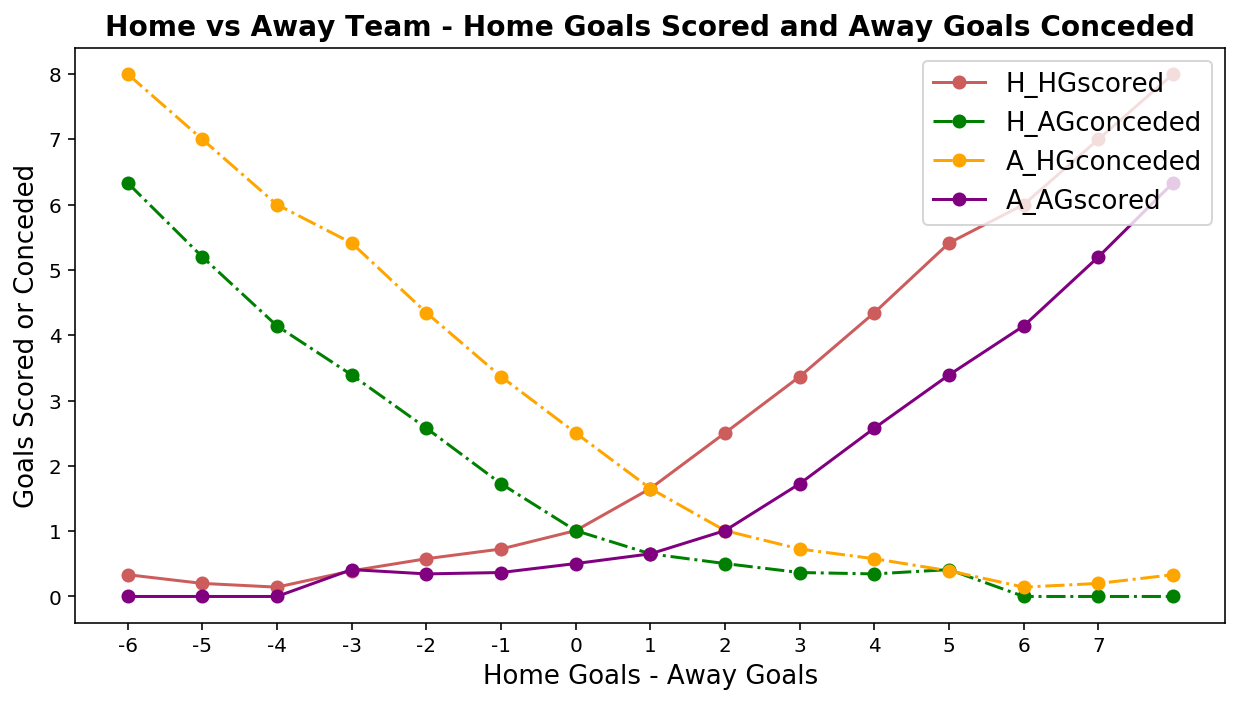

In [15]:
#plt.hist(df2.homeGoalFT - df2.awayGoalFT, range(-6,8), alpha=0.7, label='Actual',normed=True)
plt.figure(figsize=(9,5))
plt.plot([i+0.5 for i in range(-6,9)], df2.groupby('homeXResults')['homeGoalFT'].mean().values,
                  linestyle='-', marker='o',label="H_HGscored", color = '#CD5C5C')
plt.plot([i+0.5 for i in range(-6,9)], df2.groupby('homeXResults')['awayGoalFT'].mean().values,
                  linestyle='-.', marker='o',label="H_AGconceded", color = 'green')
plt.plot([i+0.5 for i in range(-6,9)], df2.groupby('awayXResults')['homeGoalFT'].mean().values,
                  linestyle='-.', marker='o',label="A_HGconceded", color = 'orange')
plt.plot([i+0.5 for i in range(-6,9)], df2.groupby('awayXResults')['awayGoalFT'].mean().values,
                  linestyle='-', marker='o',label="A_AGscored", color = 'purple')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Goals Scored or Conceded",size=13)
plt.title('Home vs Away Team - Home Goals Scored and Away Goals Conceded',size=14,fontweight='bold')
#plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [16]:
home_df2 = df2[df2.filter(regex='home', axis=1).columns]
away_df2 = df2[df2.filter(regex='away', axis=1).columns]

In [17]:
home_df2.columns, away_df2.columns

(Index(['homeAerialsTotalFT', 'homeCornersTotalFT', 'homeDispossessedFT',
        'homeDribbleSuccessFT', 'homeDribbledPastFT', 'homeDribblesAttemptedFT',
        'homeDribblesWonFT', 'homeFormation', 'homeFormationCode',
        'homeFoulsCommitedFT', 'homeGoalFT', 'homeInterceptionsFT',
        'homeOffsidesCaughtFT', 'homePassSuccessFT', 'homePassesKeyFT',
        'homePossessionFT', 'homeRatingsFT', 'homeShotsBlockedFT',
        'homeShotsOnTargetFT', 'homeShotsTotalFT', 'homeTackleSuccessFT',
        'homeTacklesTotalFT', 'homeTeam', 'homeTeamCode', 'homeXResults',
        'homeXResultsLabel', 'homeXResultsWDL'],
       dtype='object'),
 Index(['awayAerialsTotalFT', 'awayCornersTotalFT', 'awayDispossessedFT',
        'awayDribbleSuccessFT', 'awayDribbledPastFT', 'awayDribblesAttemptedFT',
        'awayDribblesWonFT', 'awayFormation', 'awayFormationCode',
        'awayFoulsCommitedFT', 'awayGoalFT', 'awayInterceptionsFT',
        'awayOffsidesCaughtFT', 'awayPassSuccessFT', 'awayPa

In [18]:
home_df2.groupby(['homeTeam'])['homeXResults', 'homeXResultsLabel'].mean()

,homeXResults,homeXResultsLabel
homeTeam,,
Arsenal,1.252632,0.536842
Aston Villa,-0.526316,-0.276316
Bournemouth,-0.131579,-0.026316
Burnley,-0.026316,0.000000
Cardiff,-0.789474,-0.210526
Chelsea,1.305263,0.568421
Crystal Palace,-0.210526,-0.171053
Everton,0.757895,0.336842
Fulham,-0.421053,-0.210526


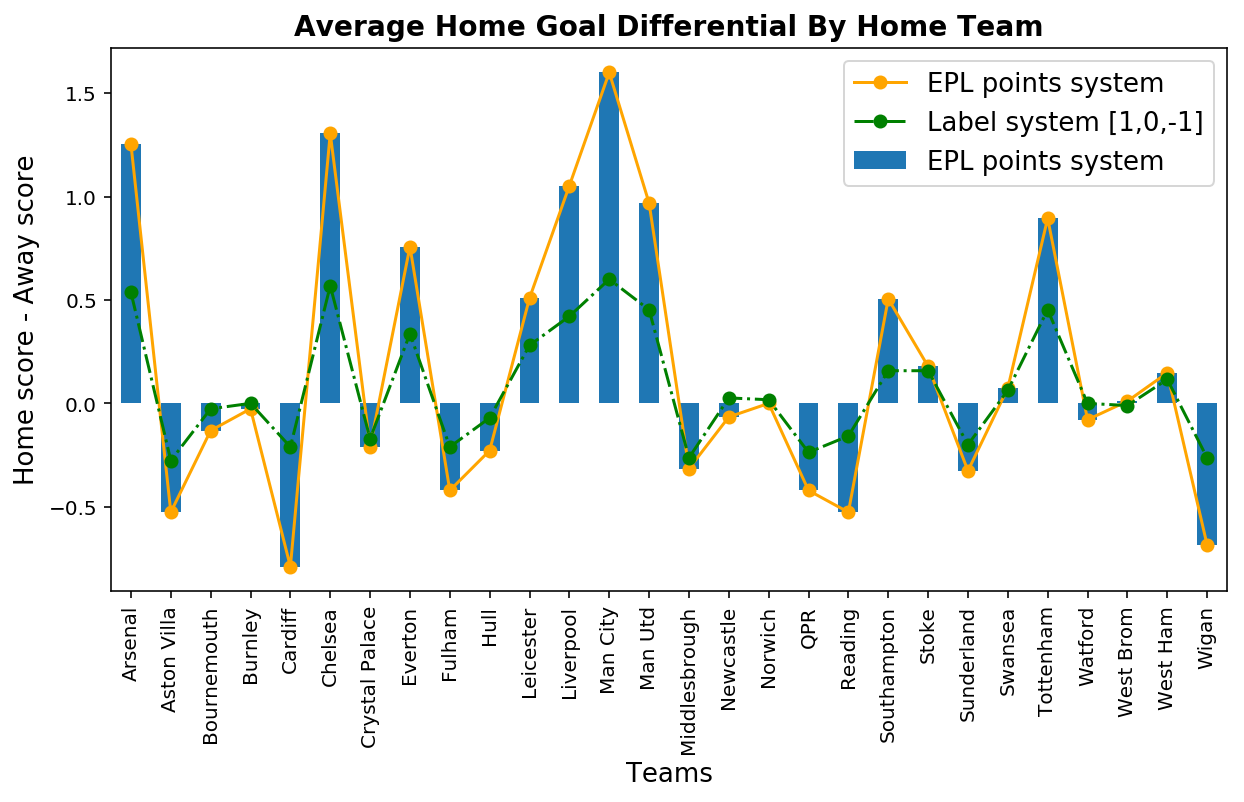

In [19]:
plt.plot(home_df2.groupby(['homeTeam'])['homeXResults', 'homeXResultsLabel'].mean().index,
        home_df2.groupby(['homeTeam'])['homeXResults', 'homeXResultsLabel'].mean().values[:,0],
        linestyle='-', marker='o',label="EPL points system", color = 'orange')
plt.plot(home_df2.groupby(['homeTeam'])['homeXResults', 'homeXResultsLabel'].mean().index,
        home_df2.groupby(['homeTeam'])['homeXResults', 'homeXResultsLabel'].mean().values[:,1],
        linestyle='-.', marker='o',label="Label system [1,0,-1]", color = 'green')
home_df2.groupby(['homeTeam'])['homeXResults'].mean().plot(kind='bar', figsize=(10, 5), label='EPL points system')
plt.legend(loc='upper right', fontsize=13)
plt.xlabel("Teams",size=13)
plt.ylabel("Home score - Away score",size=13)
plt.title('Average Home Goal Differential By Home Team',size=14,fontweight='bold')
plt.show()

In [20]:
away_df2.groupby(['awayTeam'])['awayXResults', 'awayXResultsLabel'].mean()

,awayXResults,awayXResultsLabel
awayTeam,,
Arsenal,0.421053,0.231579
Aston Villa,-1.039474,-0.386667
Bournemouth,-0.763158,-0.263158
Burnley,-1.052632,-0.552632
Cardiff,-1.421053,-0.578947
Chelsea,0.557895,0.284211
Crystal Palace,-0.368421,-0.157895
Everton,-0.157895,-0.094737
Fulham,-1.026316,-0.342105


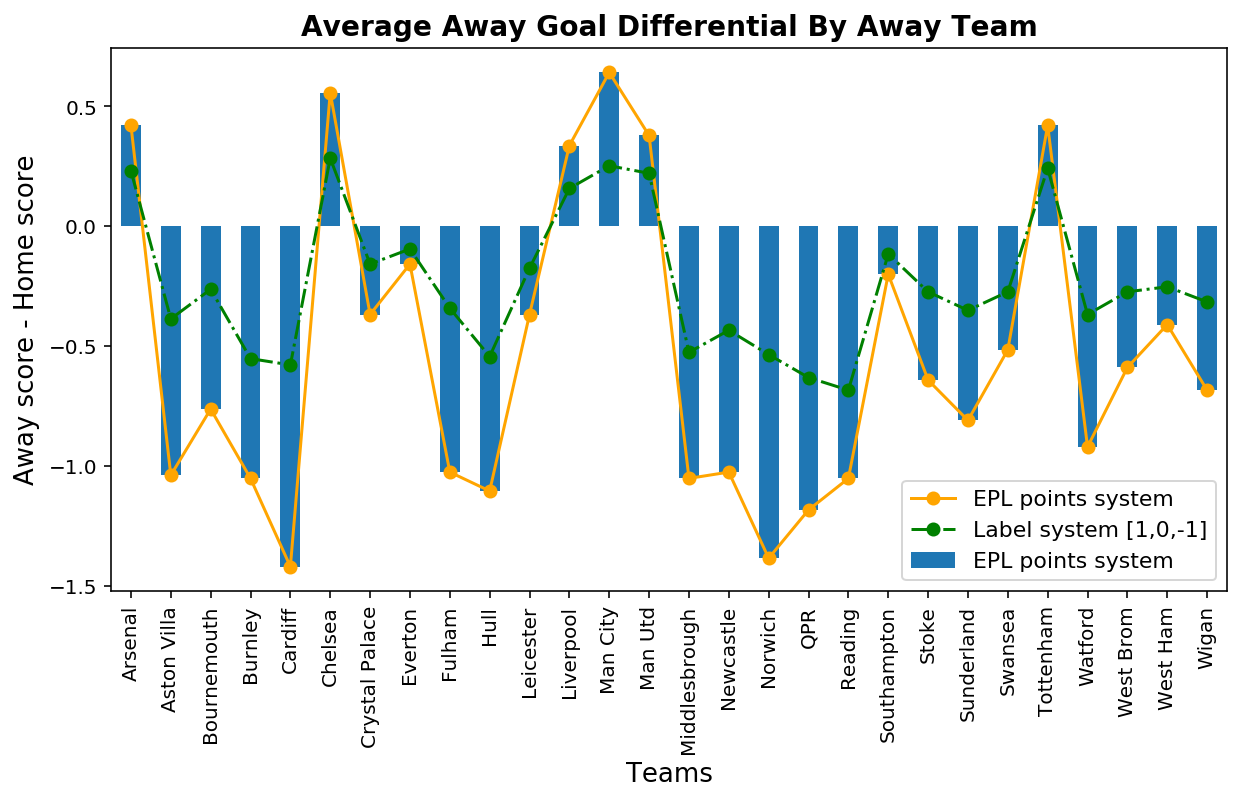

In [31]:
plt.plot(away_df2.groupby(['awayTeam'])['awayXResults', 'awayXResultsLabel'].mean().index,
        away_df2.groupby(['awayTeam'])['awayXResults', 'awayXResultsLabel'].mean().values[:,0],
        linestyle='-', marker='o',label="EPL points system", color = 'orange')
plt.plot(away_df2.groupby(['awayTeam'])['awayXResults', 'awayXResultsLabel'].mean().index,
        away_df2.groupby(['awayTeam'])['awayXResults', 'awayXResultsLabel'].mean().values[:,1],
        linestyle='-.', marker='o',label="Label system [1,0,-1]", color = 'green')
away_df2.groupby(['awayTeam'])['awayXResults'].mean().plot(kind='bar', figsize=(10, 5), label='EPL points system')
plt.legend(loc='lower right', fontsize=11)
plt.xlabel("Teams",size=13)
plt.ylabel("Away score - Home score",size=13)
plt.title('Average Away Goal Differential By Away Team',size=14,fontweight='bold')
plt.show()

In [27]:
away_df2.groupby(['awayTeam'])['awayXResults', 'awayXResultsLabel'].mean()

,awayXResults,awayXResultsLabel
awayTeam,,
Arsenal,0.421053,0.231579
Aston Villa,-1.039474,-0.386667
Bournemouth,-0.763158,-0.263158
Burnley,-1.052632,-0.552632
Cardiff,-1.421053,-0.578947
Chelsea,0.557895,0.284211
Crystal Palace,-0.368421,-0.157895
Everton,-0.157895,-0.094737
Fulham,-1.026316,-0.342105


In [25]:
df2.groupby(['homeTeam','awayTeam'])['homeXResults', 'homeXResultsLabel'].mean()

homeXResults  homeXResultsLabel
homeTeam       awayTeam                                       
Arsenal        Aston Villa         2.000000           0.500000
               Bournemouth         2.000000           1.000000
               Burnley             2.000000           1.000000
               Cardiff             2.000000           1.000000
               Chelsea             0.200000          -0.200000
               Crystal Palace      1.250000           0.750000
               Everton             1.000000           0.600000
               Fulham              1.000000           0.500000
               Hull                1.333333           0.666667
               Leicester           1.000000           1.000000
               Liverpool           0.800000           0.200000
               Man City           -0.200000           0.000000
               Man Utd             0.800000           0.200000
               Middlesbrough       0.000000           0.000000
               Newcastle           2.750000           1.000000
               Norwich             2.000000           1.000000
               QPR                 1.000000           1.000000
               Reading             3.000000           1.000000
               Southampton         1.800000           0.800000
               Stoke               2.000000           1.000000
               Sunderland          1.400000           0.600000
               Swansea            -0.600000          -0.400000
               Tottenham           0.800000           0.400000
               Watford             1.500000           0.000000
               West Brom           1.800000           1.000000
               West Ham            2.000000           0.600000
               Wigan               3.000000           1.000000
Aston Villa    Arsenal            -1.500000          -0.750000
               Bournemouth        -1.000000          -1.000000
               Burnley            -1.000000          -1.000000
               Cardiff             2.000000           1.000000
               Chelsea            -1.250000          -0.500000
               Crystal Palace      0.000000           0.000000
               Everton            -1.250000          -0.500000
               Fulham             -0.500000          -0.500000
               Hull                1.500000           1.000000
               Leicester           0.500000           0.500000
               Liverpool          -2.500000          -1.000000
               Man City           -0.500000          -0.250000
               Man Utd            -1.250000          -0.750000
               Newcastle          -0.500000          -0.500000
               Norwich             1.666667           0.666667
               QPR                 0.500000           0.500000
               Reading             1.000000           1.000000
               Southampton        -0.750000          -0.500000
               Stoke              -1.250000          -0.750000
               Sunderland          1.250000           0.250000
               Swansea             0.000000          -0.250000
               Tottenham          -2.250000          -1.000000
               Watford            -1.000000          -1.000000
               West Brom           0.250000           0.250000
               West Ham            0.000000           0.250000
               Wigan              -3.000000          -1.000000
Bournemouth    Arsenal            -1.000000          -0.500000
               Aston Villa        -1.000000          -1.000000
               Burnley             1.000000           1.000000
               Chelsea            -2.500000          -1.000000
               Crystal Palace     -1.000000          -0.500000
               Everton             0.500000           0.500000
               Hull                5.000000           1.000000
               Leicester           0.500000           0.500000
               Liverpool           0.000000           0.000000

In [ ]:
df2.columns

In [ ]:
clean_df = preprocessor.create_model_df('../data/FootballEurope/FootballEurope.csv')

In [ ]:
clean_df.head()

In [ ]:
clean_df.describe()

In [ ]:
clean_df[['awayFormation','homeFormation']].tail(8)

In [ ]:
clean_df[sorted(clean_df.filter(regex='away', axis=1).columns)].head()

# Clustering

In [ ]:
clean_df.columns